# C3.3 Absorption spectra
Jeg Vet

huangzw29@mail2.sysu.edu.cn

2021/10/14

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import Rbf,UnivariateSpline
from scipy.signal import argrelextrema

import glob,os

# 1. Data

## 1.1. Spectra

In [41]:
dfLIST = []
path = r'C3.3-Data'
file = glob.glob(os.path.join(path, '**.txt'))
for f in file:
    dfLIST.append(pd.read_csv(f, sep='\s+'))
# print(file)

In [59]:
dflist_spectra = []
for df in dfLIST:
    dflist_spectra.append(df.iloc[570:1931, 3])
df_spectra = pd.concat(dflist_spectra, axis=1, ignore_index=True)
df_spectra.insert(0, 'Wavelength', dfLIST[0].iloc[570:1931, 0])
df_spectra = df_spectra.reset_index(drop = True)
df_spectra.columns = ['Wavelength', '150', '1500', '15000', '187.5', '1875', 
                      '300', '3000', '375', '3750','750', '7500', 
                      'Empty_cuvette', 'Nothing', 'Pure_water']

df_spectra = df_spectra[['Wavelength', '150', '187.5', '300', '375', '750',  
                        '1500', '1875', '3000', '3750', '7500', '15000',
                        'Empty_cuvette', 'Nothing', 'Pure_water']]
df_spectra.to_csv(r'C3.3-Data/Spectra.csv',index=0)
df_spectra

,Wavelength,150,187.5,300,375,750,1500,1875,3000,3750,7500,15000,Empty_cuvette,Nothing,Pure_water
0,400.231,108.430,120.242,107.356,131.261,111.030,125.215,117.699,116.625,106.056,112.047,107.073,124.876,110.634,115.099
1,400.589,109.277,117.868,111.425,122.107,119.846,127.758,116.512,116.964,109.786,110.690,103.851,127.080,107.921,111.708
2,400.946,109.447,113.121,113.629,119.224,124.424,123.519,113.460,112.556,117.246,120.016,114.195,122.672,106.734,108.825
3,401.304,115.551,110.238,124.989,121.598,125.949,123.519,108.373,119.338,119.959,120.355,111.990,120.298,107.582,105.943
4,401.661,112.160,109.051,133.465,110.408,125.780,120.129,102.947,111.708,114.364,118.320,109.277,135.047,108.090,106.282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,848.677,340.220,303.976,350.983,301.100,309.332,352.561,339.318,329.117,341.741,302.397,306.738,194.182,428.085,334.021
1357,848.974,339.544,314.123,353.857,304.990,313.560,349.011,353.350,326.412,330.921,311.023,305.554,185.882,433.826,329.794
1358,849.272,336.670,319.535,354.026,320.888,322.861,355.265,346.419,338.078,331.090,312.714,316.547,192.489,427.240,329.117
1359,849.569,332.781,317.506,351.659,328.497,331.823,349.856,347.602,343.996,341.572,308.486,312.319,190.287,421.498,332.837


In [60]:
df_spectra1 = df_spectra[['Wavelength', 'Pure_water', 'Empty_cuvette', 'Nothing']]
df_spectra2 = df_spectra[['Wavelength', 'Pure_water', '150', '187.5', '300', '375', '750']]
df_spectra3 = df_spectra[['Wavelength', 'Pure_water', '1500', '1875', '3000', '3750', '7500', '15000']]

## 1.2. Absorption

In [44]:
df_abs = pd.read_csv('C3.3-Data\Absorbancy.csv', na_values='NAN')
df_abs.drop('Unnamed: 15',axis=1, inplace=True)
df_abs.reset_index(inplace=True, drop=True)

In [55]:
df_abs1 = df_abs[['Wavelength', 'Pure_water', 'Empty_cuvette', 'Nothing']]
df_abs2 = df_abs[['Wavelength', 'Pure_water', '150', '187.5', '300', '375', '750']]
df_abs3 = df_abs[['Wavelength', 'Pure_water', '1500', '1875', '3000', '3750', '7500', '15000']]

In [56]:
df_abs1.dropna(inplace=True)
df_abs2.dropna(inplace=True)
df_abs3.dropna(inplace=True)

C:\Users\12977\AppData\Local\Temp/ipykernel_276/3788117873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abs1.dropna(inplace=True)
C:\Users\12977\AppData\Local\Temp/ipykernel_276/3788117873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abs2.dropna(inplace=True)
C:\Users\12977\AppData\Local\Temp/ipykernel_276/3788117873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abs3.dropna(inplace=True)


# 2. Base

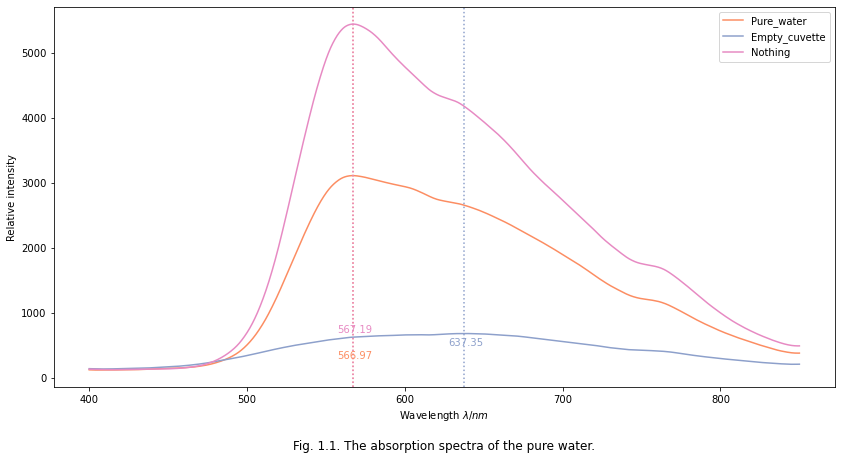

In [47]:
fig = plt.figure(figsize=(14, 7))
for i in np.arange(1, df_spectra1.shape[1]):
    lam_dns = np.linspace(400,850,10000)
    itp_func = Rbf(df_spectra1['Wavelength'], df_spectra1.iloc[:,i], smooth = 1000)
    itp = itp_func(lam_dns)
    top_lam = lam_dns[argrelextrema(itp, np.greater, order=1000)]
    plt.plot(lam_dns, itp, label=df_spectra1.columns[i], color=plt.cm.Set2(i))
    plt.axvline(x = top_lam, ls=':', color=plt.cm.Set2(i))
    plt.annotate('{:.2f}'.format(top_lam[0]), xy=(top_lam-10, 100+i*200), color=plt.cm.Set2(i))
plt.legend()
plt.xlabel('Wavelength $\lambda /nm$')
plt.ylabel('Relative intensity')
plt.title('Fig. 1.1. The absorption spectra of the pure water.', y=-0.18)
plt.savefig(r'C3.3-Output\Fig.1.1.png', bbox_inches = 'tight', dpi=300)

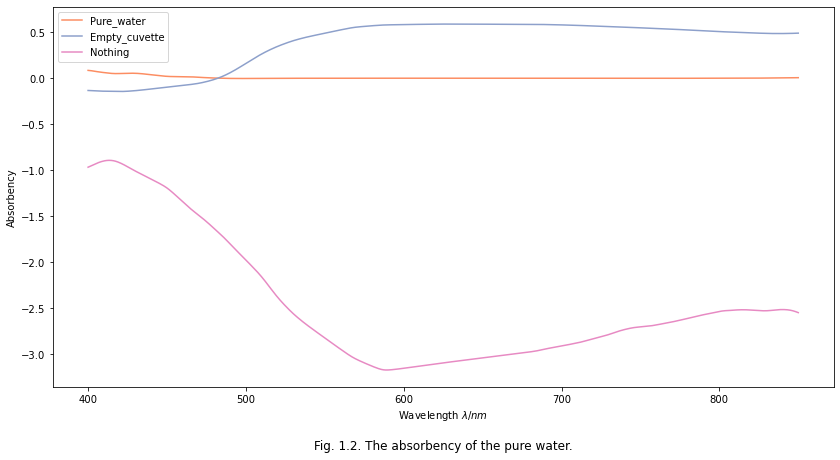

In [107]:
fig = plt.figure(figsize=(14, 7))
for i in np.arange(1, df_abs1.shape[1]):
    lam_dns = np.linspace(400,850,10000)
    itp_func = Rbf(df_abs1['Wavelength'], df_abs1.iloc[:,i], smooth=150)
    itp = itp_func(lam_dns)
    top_abs = itp[argrelextrema(itp, np.greater, order=5000)]
    top_lam = lam_dns[argrelextrema(itp, np.greater, order=5000)]
    plt.plot(lam_dns, itp, label=df_abs1.columns[i], color=plt.cm.Set2(i))
plt.legend()
plt.xlabel('Wavelength $\lambda /nm$')
plt.ylabel('Absorbency')
plt.title('Fig. 1.2. The absorbency of the pure water.', y=-0.18)
plt.savefig(r'C3.3-Output\Fig.1.2.png', bbox_inches = 'tight', dpi=300)

# 2. Low concentration: Beer's law

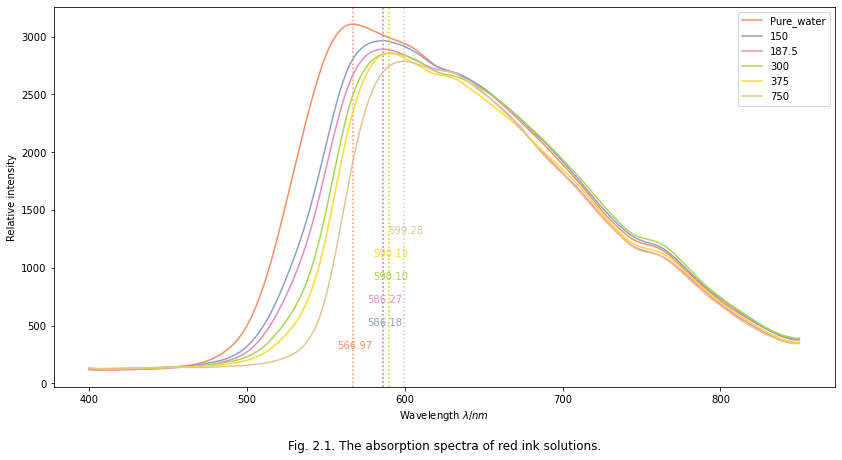

In [51]:
fig = plt.figure(figsize=(14, 7))
for i in np.arange(1, df_spectra2.shape[1]):
    lam_dns = np.linspace(400,850,10000)
    itp_func = Rbf(df_spectra2['Wavelength'], df_spectra2.iloc[:,i], smooth = 1000)
    itp = itp_func(lam_dns)
    top_lam = lam_dns[argrelextrema(itp, np.greater, order=1000)]
    plt.plot(lam_dns, itp, label=df_spectra2.columns[i], color=plt.cm.Set2(i))
    plt.axvline(x = top_lam, ls=':', color=plt.cm.Set2(i))
    plt.annotate('{:.2f}'.format(top_lam[0]), xy=(top_lam-10, 100+i*200), color=plt.cm.Set2(i))
plt.legend()
plt.xlabel('Wavelength $\lambda /nm$')
plt.ylabel('Relative intensity')
plt.title('Fig. 2.1. The absorption spectra of red ink solutions.', y=-0.18)
plt.savefig(r'C3.3-Output\Fig.2.1.png', bbox_inches = 'tight', dpi=300)

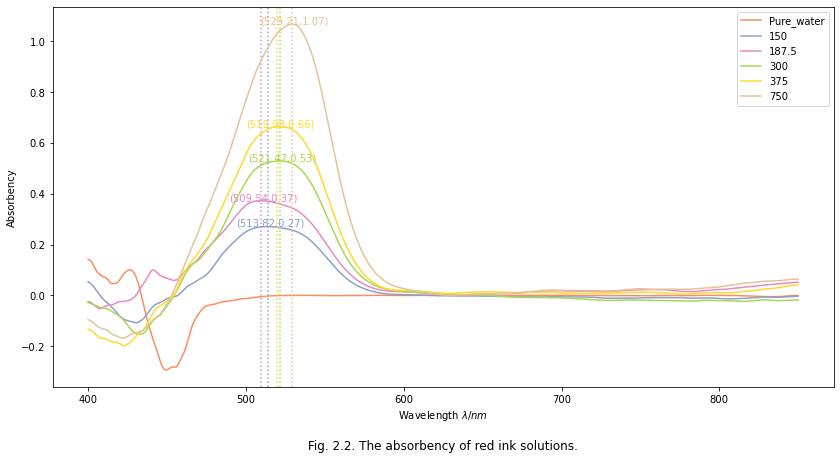

In [64]:
fig = plt.figure(figsize=(14, 7))
top_abs_list1 = []
for i in np.arange(1, df_abs2.shape[1]):
    lam_dns = np.linspace(400,850,10000)
    itp_func = Rbf(df_abs2['Wavelength'], df_abs2.iloc[:,i], smooth=150)
    itp = itp_func(lam_dns)
    top_abs = itp[argrelextrema(itp, np.greater, order=5000)]
    top_lam = lam_dns[argrelextrema(itp, np.greater, order=5000)]
    top_abs_list1.append(top_abs[0])
    plt.plot(lam_dns, itp, label=df_abs2.columns[i], color=plt.cm.Set2(i))
    if top_abs[0] > 0.2:
        plt.axvline(x = top_lam[0], ls=':', color=plt.cm.Set2(i))
        plt.annotate('({:.2f},{:.2f})'.format(top_lam[0], top_abs[0]), xy=(top_lam[0]-20, top_abs[0]), color=plt.cm.Set2(i))
plt.legend()
plt.xlabel('Wavelength $\lambda /nm$')
plt.ylabel('Absorbency')
plt.title('Fig. 2.2. The absorbency of red ink solutions.', y=-0.18)
plt.savefig(r'C3.3-Output\Fig.2.2.png', bbox_inches = 'tight', dpi=300)

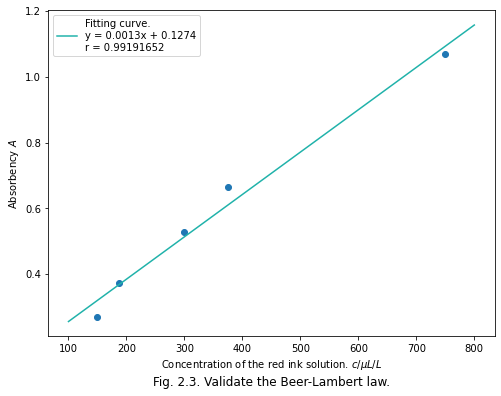

In [78]:
ABS_func = np.polyfit([150, 187.5, 300, 375, 750], top_abs_list1[1:], deg=1)
c_dns = np.linspace(100, 800, 10)
abs_reg = np.polyval(ABS_func, c_dns)

r = np.corrcoef([150, 187.5, 300, 375, 750], top_abs_list1[1:])[0,1]
A1, A2 = tuple(ABS_func)

plt.figure(figsize= (8,6))
plt.scatter([150, 187.5, 300, 375, 750], top_abs_list1[1:])
plt.plot(c_dns, abs_reg, color='lightseagreen', 
                          label='Fitting curve. \ny = {:.4f}x + {:.4f}\nr = {:.8f}'
                          .format(A1, A2, r))
plt.legend()
plt.xlabel('Concentration of the red ink solution. $c /\mu L/L$')
plt.ylabel('Absorbency $A$')
plt.title('Fig. 2.3. Validate the Beer-Lambert law.', y=-0.17)
plt.savefig(r'C3.3-Output\Fig.2.3.png', bbox_inches = 'tight', dpi=300)    

# 3. High concentration: Non-linear character

In [58]:
df_spectra3

,Wavelength,Pure_water,1500,1875,3000,3750,3750,7500,15000
0,400.231,115.099,125.215,117.699,116.625,106.056,106.056,112.047,107.073
1,400.589,111.708,127.758,116.512,116.964,109.786,109.786,110.690,103.851
2,400.946,108.825,123.519,113.460,112.556,117.246,117.246,120.016,114.195
3,401.304,105.943,123.519,108.373,119.338,119.959,119.959,120.355,111.990
4,401.661,106.282,120.129,102.947,111.708,114.364,114.364,118.320,109.277
...,...,...,...,...,...,...,...,...,...
1356,848.677,334.021,352.561,339.318,329.117,341.741,341.741,302.397,306.738
1357,848.974,329.794,349.011,353.350,326.412,330.921,330.921,311.023,305.554
1358,849.272,329.117,355.265,346.419,338.078,331.090,331.090,312.714,316.547
1359,849.569,332.837,349.856,347.602,343.996,341.572,341.572,308.486,312.319


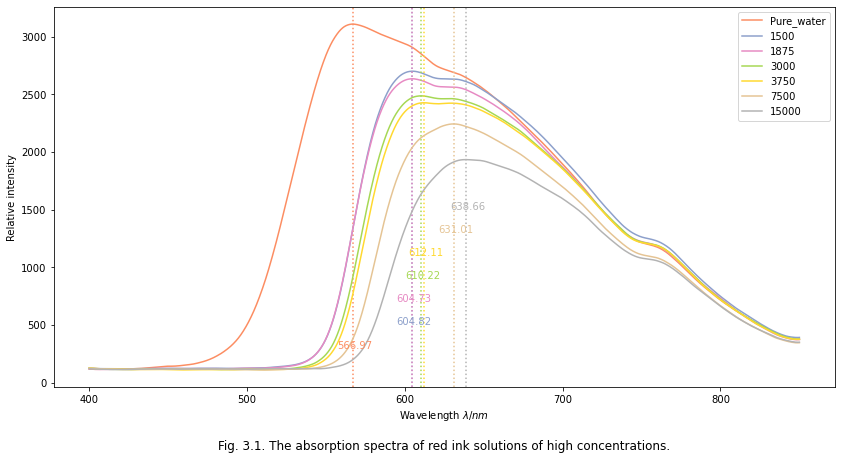

In [61]:
fig = plt.figure(figsize=(14, 7))
for i in np.arange(1, df_spectra3.shape[1]):
    lam_dns = np.linspace(400,850,10000)
    itp_func = Rbf(df_spectra3['Wavelength'], df_spectra3.iloc[:,i], smooth = 1000)
    itp = itp_func(lam_dns)
    top_lam = lam_dns[argrelextrema(itp, np.greater, order=1500)]
    plt.plot(lam_dns, itp, label=df_spectra3.columns[i], color=plt.cm.Set2(i))
    plt.axvline(x = top_lam[0], ls=':', color=plt.cm.Set2(i))
    plt.annotate('{:.2f}'.format(top_lam[0]), xy=(top_lam[0]-10, 100+i*200), color=plt.cm.Set2(i))
plt.legend()
plt.xlabel('Wavelength $\lambda /nm$')
plt.ylabel('Relative intensity')
plt.title('Fig. 3.1. The absorption spectra of red ink solutions of high concentrations.', y=-0.18)
plt.savefig(r'C3.3-Output\Fig.3.1.png', bbox_inches = 'tight', dpi=300)

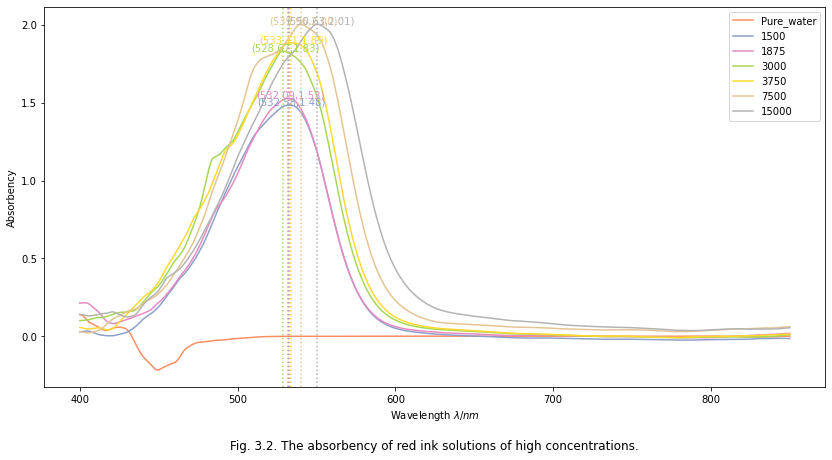

In [65]:
fig = plt.figure(figsize=(14, 7))
top_abs_list2 = []
for i in np.arange(1, df_abs3.shape[1]):
    lam_dns = np.linspace(400,850,10000)
    itp_func = Rbf(df_abs3['Wavelength'], df_abs3.iloc[:,i], smooth=150)
    itp = itp_func(lam_dns)
    top_abs = itp[argrelextrema(itp, np.greater, order=5000)]
    top_lam = lam_dns[argrelextrema(itp, np.greater, order=5000)]
    top_abs_list2.append(top_abs[0])
    plt.plot(lam_dns, itp, label=df_abs3.columns[i], color=plt.cm.Set2(i))
    if top_abs[0] > 0.2:
        plt.axvline(x = top_lam[0], ls=':', color=plt.cm.Set2(i))
        plt.annotate('({:.2f},{:.2f})'.format(top_lam[0], top_abs[0]), xy=(top_lam[0]-20, top_abs[0]), color=plt.cm.Set2(i))
plt.legend()
plt.xlabel('Wavelength $\lambda /nm$')
plt.ylabel('Absorbency')
plt.title('Fig. 3.2. The absorbency of red ink solutions of high concentrations.', y=-0.18)
plt.savefig(r'C3.3-Output\Fig.3.2.png', bbox_inches = 'tight', dpi=300)

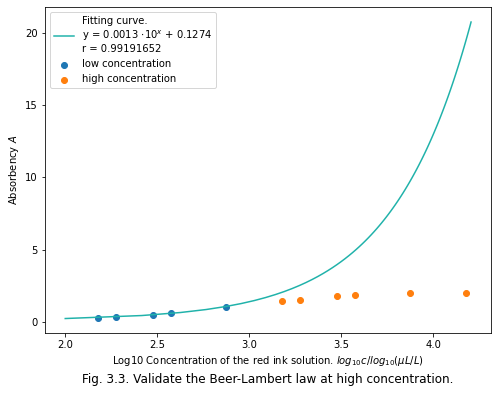

In [83]:
c_dns = np.linspace(100, 16000, 100)
abs_reg = np.polyval(ABS_func, c_dns)

plt.figure(figsize= (8,6))
plt.scatter(np.log10([150, 187.5, 300, 375, 750]), top_abs_list1[1:], label = 'low concentration')
plt.scatter(np.log10([1500, 1875, 3000, 3750, 7500, 15000]), top_abs_list2[1:], label = 'high concentration')
plt.plot(np.log10(c_dns), abs_reg, color='lightseagreen', 
                          label='Fitting curve. \ny = {:.4f} $\cdot 10^x$ + {:.4f}\nr = {:.8f}'
                          .format(A1, A2, r))
plt.legend()
plt.xlabel('Log10 Concentration of the red ink solution. $log_{10}c /log_{10}(\mu L/L)$')
plt.ylabel('Absorbency $A$')
plt.title('Fig. 3.3. Validate the Beer-Lambert law at high concentration.', y=-0.17)
plt.savefig(r'C3.3-Output\Fig.3.3.png', bbox_inches = 'tight', dpi=300)    

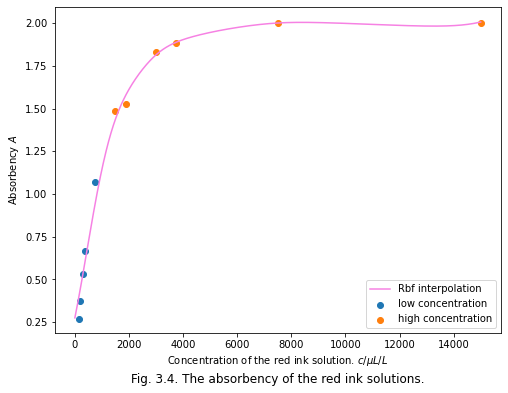

In [104]:
plt.figure(figsize= (8,6))
plt.scatter([150, 187.5, 300, 375, 750], top_abs_list1[1:], label = 'low concentration')
plt.scatter([1500, 1875, 3000, 3750, 7500, 15000], top_abs_list2[1:], label = 'high concentration')

lam_dns = np.linspace(0,15000,1000)
itp_func = Rbf([150, 187.5, 300, 375, 750, 1500, 1875, 3000, 3750, 7500, 15000], top_abs_list1[1:]+top_abs_list2[1:], smooth=0.05)
itp = itp_func(lam_dns)
plt.plot(lam_dns, itp, label= 'Rbf interpolation', color='#F681E3')
plt.legend()
plt.xlabel('Concentration of the red ink solution. $c /\mu L/L$')
plt.ylabel('Absorbency $A$')
plt.title('Fig. 3.4. The absorbency of the red ink solutions.', y=-0.17)
plt.savefig(r'C3.3-Output\Fig.3.4.png', bbox_inches = 'tight', dpi=300) 
